In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import EarlyStopping as es

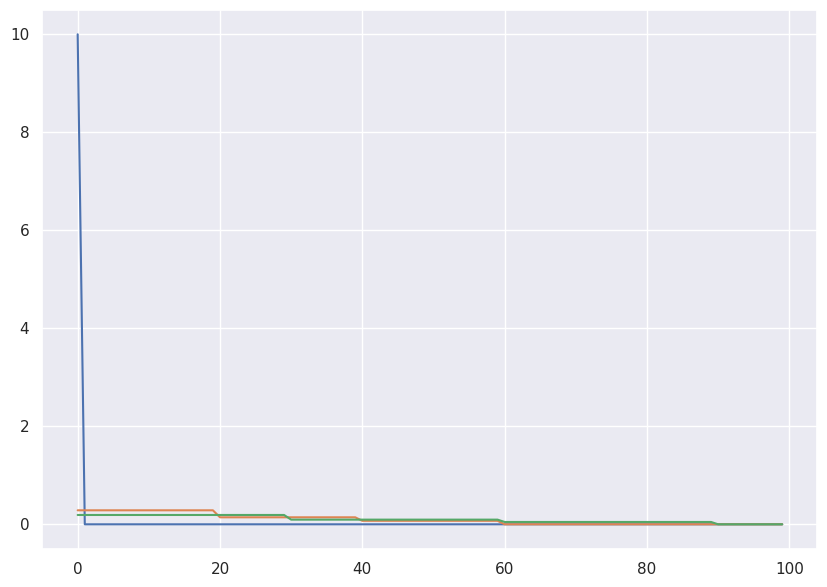

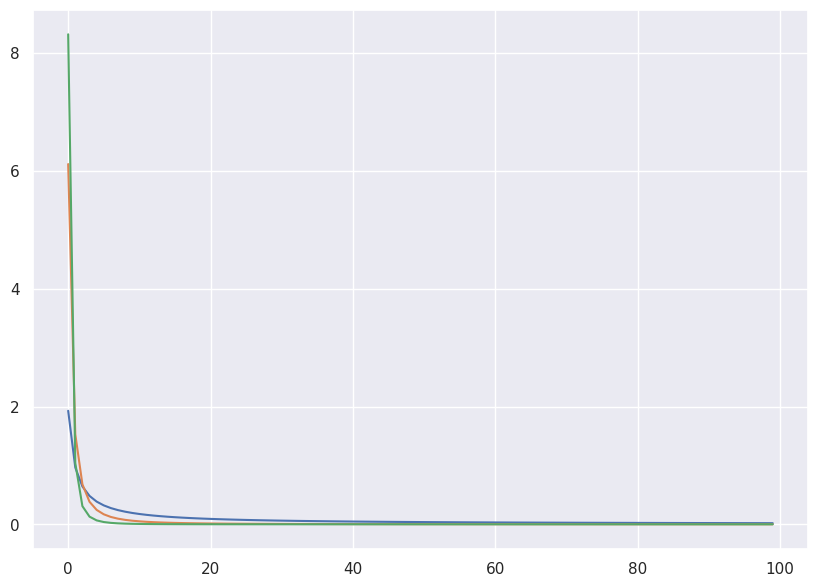

In [9]:
# Metaparameters
sampleSize = 100
paraSize   = 100

# Gamma-sparse signals
beta_3   = 1 / (1 + np.arange(paraSize))**3
beta_3   = 10 * beta_3 / np.sum(np.abs(beta_3))

beta_2   = 1 / (1 + np.arange(paraSize))**2  
beta_2   = 10 * beta_2 / np.sum(np.abs(beta_2))

beta_1   = 1 / (1 + np.arange(paraSize))
beta_1   = 10 * beta_1 / np.sum(np.abs(beta_1))

# S-sparse signals
beta_15        = np.zeros(paraSize)  
beta_15[0]   = 1
beta_15        = 10 * beta_15 / np.sum(np.abs(beta_15))

beta_60        = np.zeros(paraSize)  
beta_60[0:20]  = 1
beta_60[20:40] = 0.5
beta_60[40:60] = 0.25
beta_60        = 10 * beta_60 / np.sum(np.abs(beta_60))

beta_90        = np.zeros(paraSize)  
beta_90[0:30]  = 1
beta_90[30:60] = 0.5
beta_90[60:90] = 0.25
beta_90        = 10 * beta_90 / np.sum(np.abs(beta_90))

fig = plt.figure(figsize = (10,7))
plt.plot(beta_15[0:100])
plt.plot(beta_60[0:100])
plt.plot(beta_90[0:100])

fig = plt.figure(figsize = (10,7))
plt.plot(beta_1[0:100])
plt.plot(beta_2[0:100])
plt.plot(beta_3[0:100])

In [10]:
# Simulating data
cov = np.identity(paraSize)

sigma = np.sqrt(1)
X     = np.random.multivariate_normal(np.zeros(paraSize), cov, sampleSize)
f     = X @ beta_90
eps   = np.random.normal(0, sigma, sampleSize)
Y     = f + eps

(0.0, 10.0)

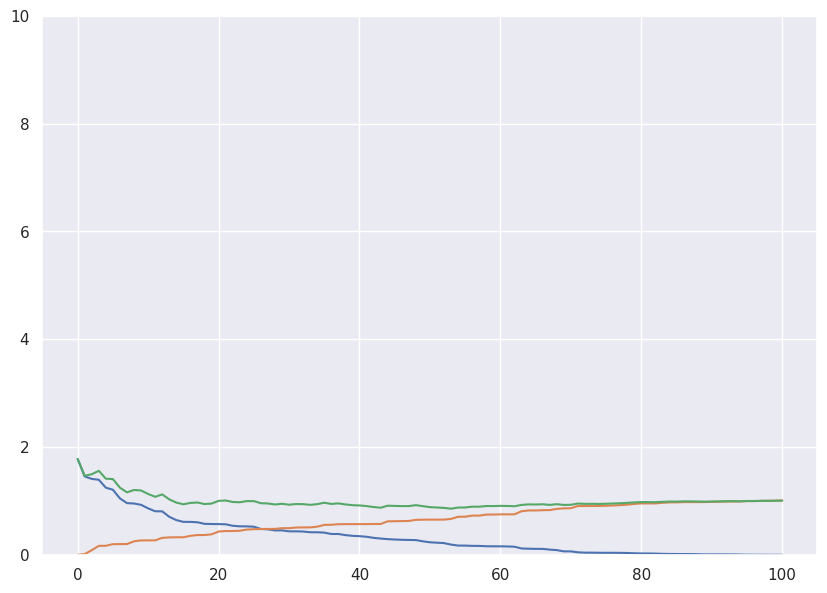

In [11]:
# Trying out the L2Boost algorithm
alg = es.L2Boost(X, Y, f)
alg.boost(sampleSize)

fig = plt.figure(figsize = (10, 7))
plt.plot(alg.bias2)
plt.plot(alg.stochError)
plt.plot(alg.mse)
plt.ylim((0, 10))

(0.0, 10.0)

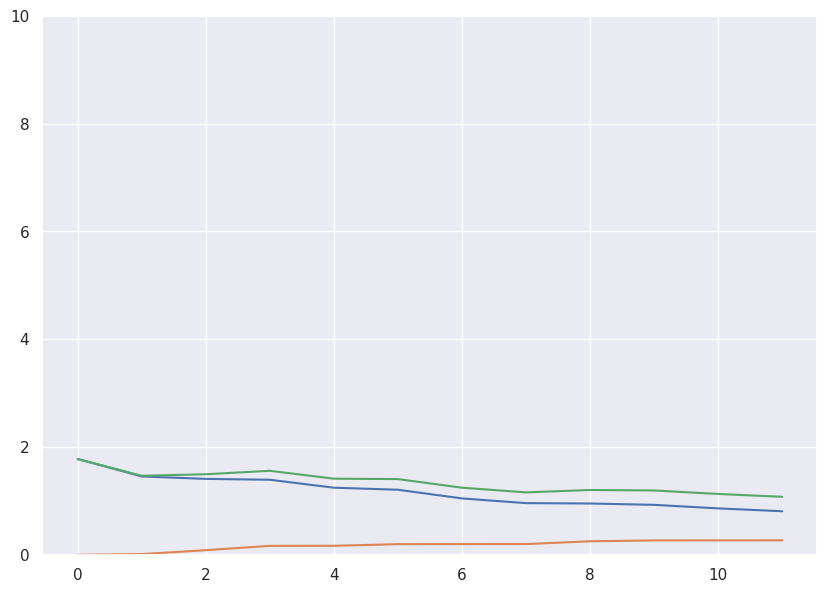

In [12]:
empNoiseLevel = np.mean(eps**2)
alg = es.L2Boost(X, Y, f)
alg.boostToEarlyStop(crit = empNoiseLevel, maxIter = sampleSize)
alg.iter

fig = plt.figure(figsize = (10, 7))
plt.plot(alg.bias2)
plt.plot(alg.stochError)
plt.plot(alg.mse)
plt.ylim((0, 10))